
#**PRAKTIKUM SISTEM MULTIMEDIA PT(1)**

Nama: Catherine V. Pang

NRP/Prodi: 2C22200008 Sains Data VI/A

Tanggal: Senin, 10 Maret 2025

Materi:
- Pemrosesan Audio dan Ekstraksi Audio
- Pemrosesan Gambar dan Ekstraksi Gambar

Library: Librosa & OpenCV

Dokumentasi: https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html



## 1. Pengenalan Librosa untuk Pemrosesan Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 1.1 Instalasi

In [ ]:
pip install librosa

### 1.2 Membaca file audio

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

file_path = 'audio_sample.wav'
y, sr = librosa.load(file_path, sr=None)

#sr = sampling rate, adalah jumlah sampel audio yang diambil per deti dalam

Jika sr=None, maka librosa.load() akan menggunakan sampling rate asli dari file audio.
Jika ingin memaksa audio ke sampling rate tertentu, bisa diatur, misalnya: ```y, sr = librosa.load(file_path, sr=16000)  # Paksa sampling rate ke 16 kHz```

### 1.3 Menampilkan gelombang audio

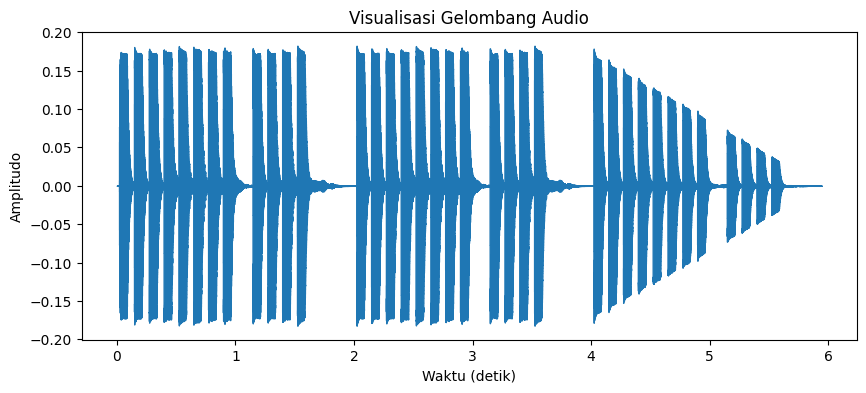

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.title("Visualisasi Gelombang Audio")
plt.show()

### 1.4 Ekstraksi Fitur Audio

1.4.1 Mel-Frequency Cepstral Coefficients (MFCCs)

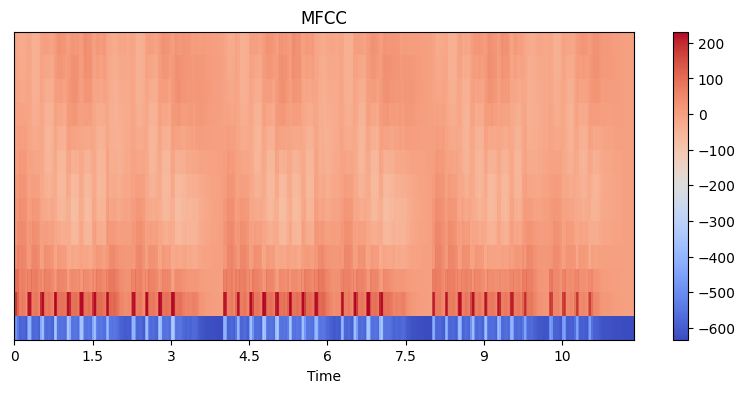

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.show()

1.4.2 Spectogram

<ipython-input-9-1bef05dea183>:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


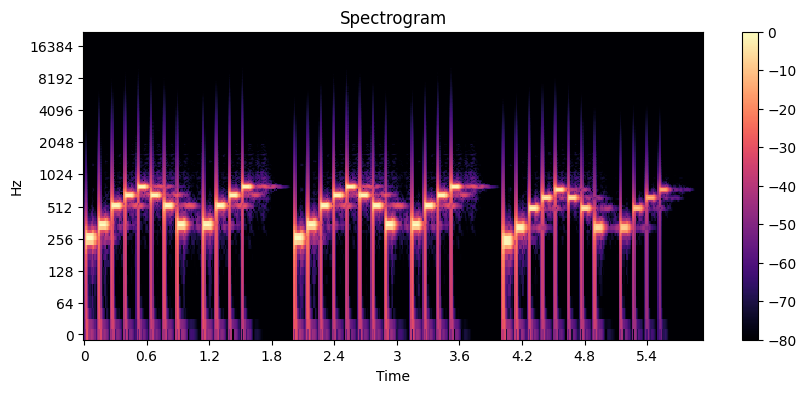

In [ ]:
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Spectrogram")
plt.show()

## 2. Pengenalan OpenCV untuk Pemrosesan Citra

2.1 Instalasi

In [1]:
pip install opencv-python

2.2 Membaca dan Menampilkan Gambar

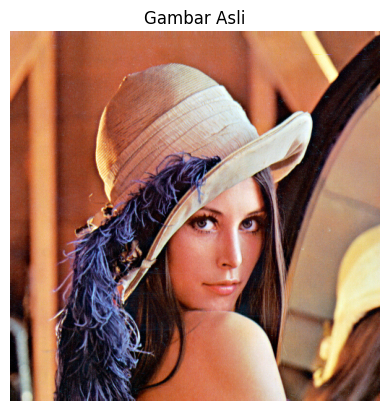

In [3]:
import cv2
import matplotlib.pyplot as plt

gambar = cv2.imread('/lena.jpg')
gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

plt.imshow(gambar)
plt.axis('off')
plt.title("Gambar Asli")
plt.show()

### 2.3 Ekstraksi Fitur

2.3.1 Edge detection

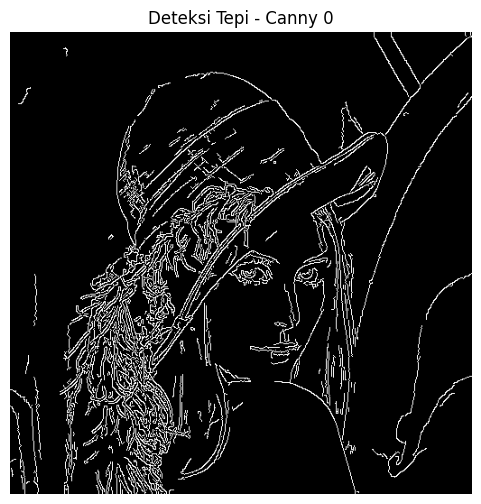

In [10]:
gray_tanpablurred0 = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
edges0 = cv2.Canny(gray_tanpablurred, 100, 200)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny 0")
plt.show()

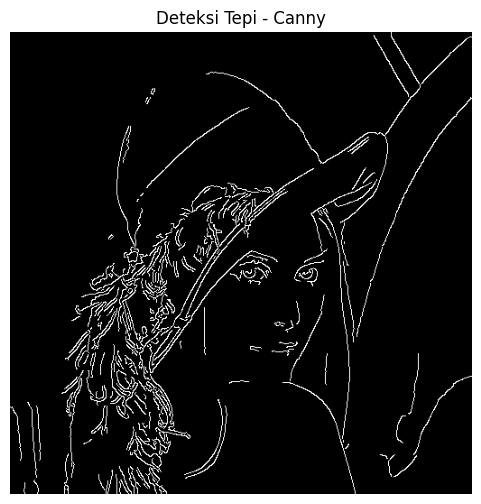

In [15]:
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (3,3), 0)
edges = cv2.Canny(blurred, 150, 250)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny")
plt.show()

* Hasil deteksi tepi sudah cukup baik karena menyoroti batas-batas utama dalam gambar, seperti kontur wajah, topi, dan bulu di sisi kiri gambar.
* Kernel 3×3 memberikan efek smoothing ringan, mengurangi noise kecil tetapi tetap mempertahankan detail.
* Threshold bawah 150: Hanya mendeteksi tepi yang kontrasnya cukup tinggi.
* Threshold atas 250: Menghindari pendeteksian noise, hanya mempertahankan tepi yang benar-benar signifikan.

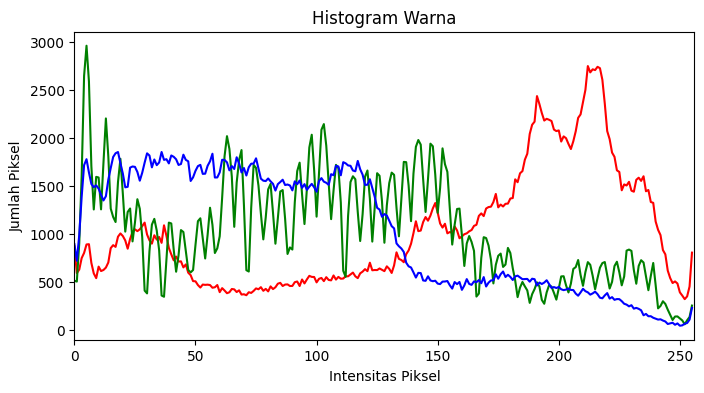

In [ ]:
import numpy as np

# Menghitung histogram untuk setiap kanal warna
color = ('r', 'g', 'b')
plt.figure(figsize=(8, 4))
for i, col in enumerate(color):
    hist = cv2.calcHist([gambar], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Histogram Warna")
plt.xlabel("Intensitas Piksel")
plt.ylabel("Jumlah Piksel")
plt.show()

1. Red

* Memiliki puncak tinggi pada nilai intensitas sekitar 200-250.
* Ini menunjukkan bahwa ada banyak area dalam gambar yang memiliki warna merah terang, mungkin dari warna kulit dan latar belakang.

2. Green

* Distribusinya lebih menyebar, dengan fluktuasi yang cukup tinggi.
* Bisa jadi karena ada banyak detail halus dalam gambar, seperti bulu pada topi dan latar belakang.

3. Blue

* Memiliki distribusi lebih stabil tetapi menurun secara bertahap setelah nilai 100.
* Ini berarti warna biru lebih dominan di area dengan intensitas rendah hingga sedang.


#3. Tugas

1. Ubah nilai threshold pada cv2.Canny() menjadi beberapa kombinasi berikut:
(50, 150)
(100, 200)
(200, 300)

2. Ubah ukuran kernel Gaussian Blur (3×3), (5×5), (7×7).
3. Kombinasikan setiap nilai threshold (nomor 1) dengan kernel Gaussian Blur (nomor 2)
4. Bandingkan hasil dari nomor 1 hingga 3 dan jelaskan bagaimana perubahan smoothing memengaruhi hasil deteksi tepi.

## Nomor 1

Ubah nilai threshold pada cv2.Canny() menjadi beberapa kombinasi berikut: (50, 150) (100, 200) (200, 300)

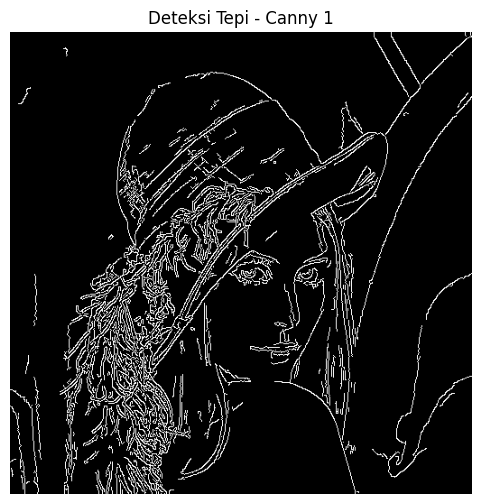

In [11]:
gray_tanpablurred1 = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
edges1 = cv2.Canny(gray_tanpablurred, 50, 150)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny 1")
plt.show()


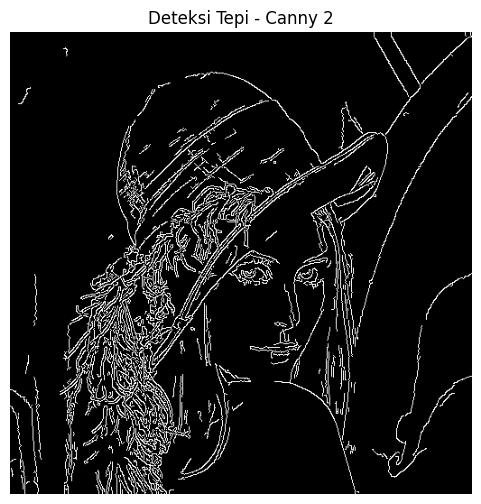

In [12]:
gray_tanpablurred2 = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
edges2 = cv2.Canny(gray_tanpablurred, 100, 200)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny 2")
plt.show()

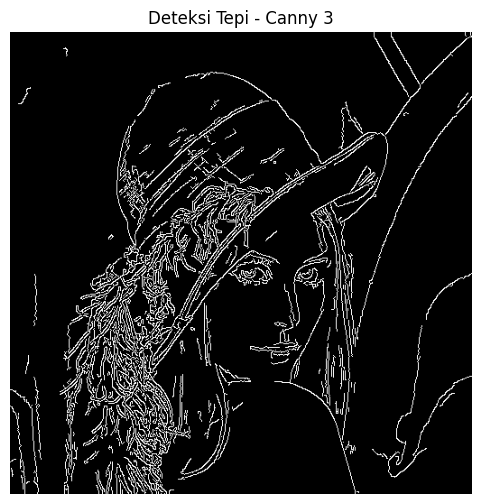

In [13]:
gray_tanpablurred3 = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
edges3 = cv2.Canny(gray_tanpablurred, 200, 300)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny 3")
plt.show()

##Nomor 2

Ubah ukuran kernel Gaussian Blur (3×3), (5×5), (7×7).

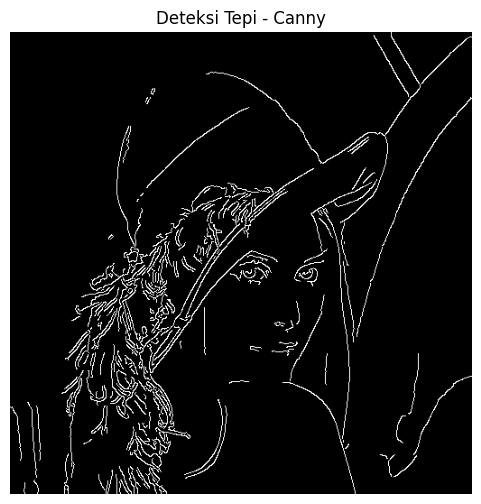

In [16]:
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (3,3), 0)
edges = cv2.Canny(blurred, 150, 250)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny")
plt.show()

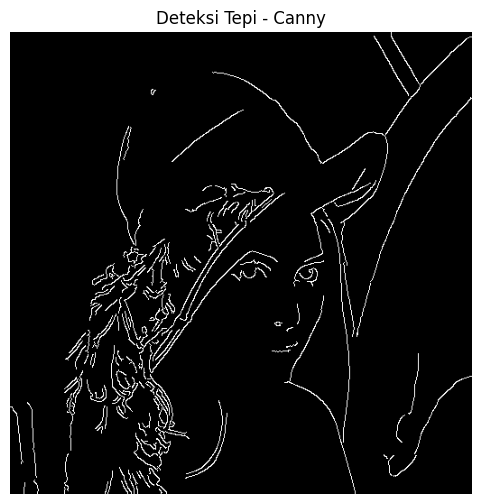

In [17]:
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blurred, 150, 250)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny")
plt.show()

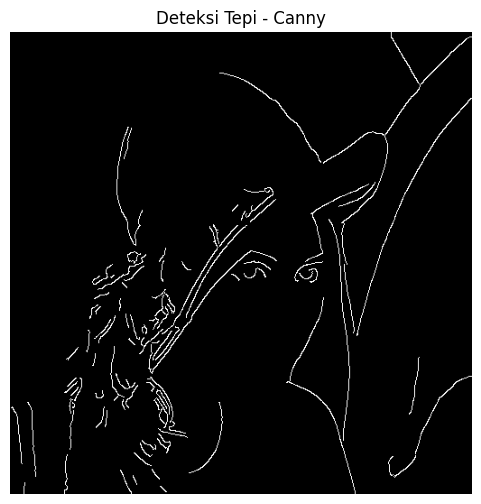

In [18]:
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (7,7), 0)
edges = cv2.Canny(blurred, 150, 250)

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Deteksi Tepi - Canny")
plt.show()

##Nomor 3

Kombinasikan setiap nilai threshold (nomor 1) dengan kernel Gaussian Blur (nomor 2)

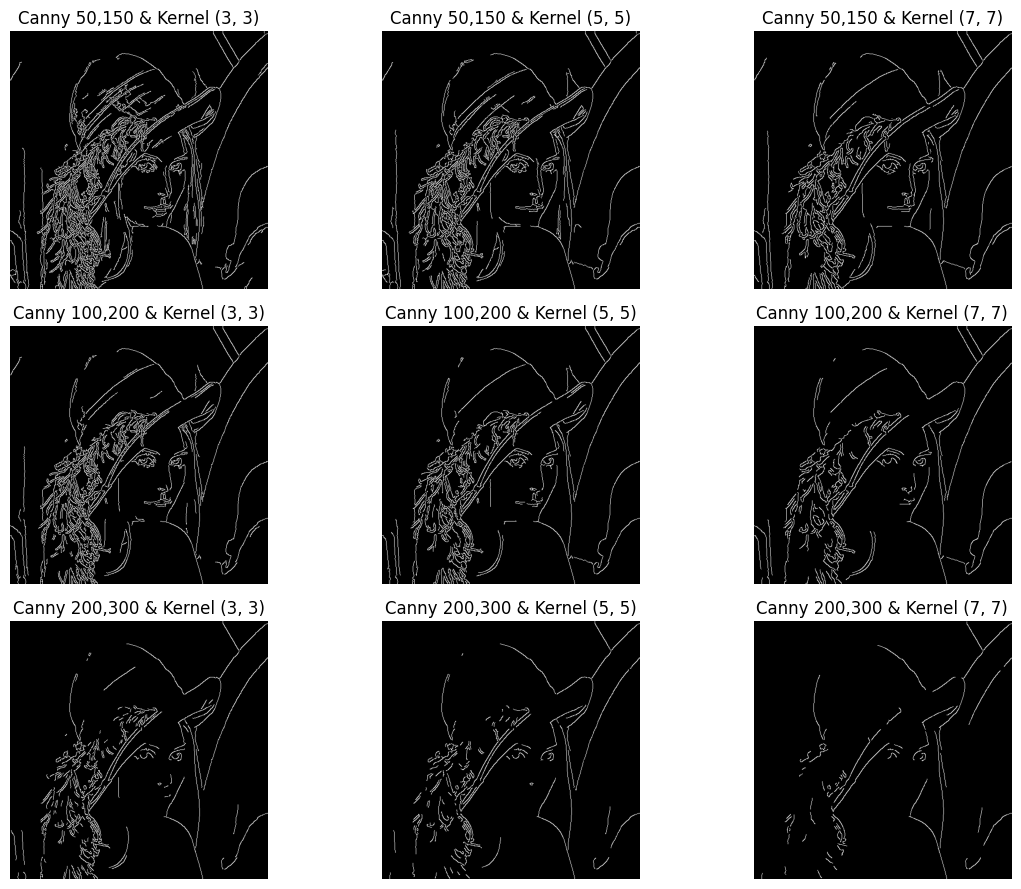

In [20]:
import cv2
import matplotlib.pyplot as plt

# Konversi gambar ke grayscale
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)

# Daftar kombinasi threshold Canny
thresholds = [(50,150), (100,200), (200,300)]

# Daftar ukuran kernel Gaussian Blur
kernels = [(3,3), (5,5), (7,7)]

# Buat plot untuk semua kombinasi
plt.figure(figsize=(12, 9))

plot_index = 1

for i, (thresh1, thresh2) in enumerate(thresholds):  # Looping threshold
    for j, kernel_size in enumerate(kernels):  # Looping ukuran kernel
        # Terapkan Gaussian Blur
        blurred = cv2.GaussianBlur(gray, kernel_size, 0)

        # Terapkan Canny Edge Detection dengan threshold tertentu
        edges = cv2.Canny(blurred, thresh1, thresh2)

        # Plot hasilnya
        plt.subplot(len(thresholds), len(kernels), plot_index)
        plt.imshow(edges, cmap='gray')
        plt.axis('off')
        plt.title(f"Canny {thresh1},{thresh2} & Kernel {kernel_size}")

        plot_index += 1

plt.tight_layout()
plt.show()


## Nomor 4

Bandingkan hasil dari nomor 1 hingga 3 dan jelaskan bagaimana perubahan smoothing memengaruhi hasil deteksi tepi.

###**Interpretasi Rinci Pengaruh Gaussian Blur dan Threshold pada Deteksi Tepi (Canny Edge Detection)**

Gambar yang ditampilkan menunjukkan hasil deteksi tepi dengan kombinasi threshold dan Gaussian Blur (*smoothing*).


1. Pengaruh Threshold pada Deteksi Tepi

Threshold dalam Canny Edge Detection terdiri dari dua nilai:
- Threshold bawah: Jika gradasi tepi lebih kecil dari nilai ini, maka tidak dianggap sebagai tepi.
- Threshold atas: Jika gradasi tepi lebih besar dari nilai ini, maka pasti dianggap sebagai tepi. Jika gradasi berada di antara kedua nilai ini, maka akan diterima sebagai tepi hanya jika terhubung ke tepi yang kuat.

Dari gambar hasil:
- (50,150) → Banyak tepi kecil yang terdeteksi
Sensitivitas tinggi menyebabkan munculnya detail yang sangat halus, termasuk noise. Terlihat banyak garis-garis kecil yang mungkin tidak signifikan.

- (100,200) → Deteksi lebih seimbang
Noise berkurang, tetapi struktur utama tetap terlihat jelas. Detail yang tidak penting mulai dihilangkan, tetapi tepi objek utama tetap tajam.

- (200,300) → Hanya tepi kuat yang dipertahankan
Detail kecil hampir sepenuhnya hilang. Hanya perubahan kontras yang sangat jelas yang dipertahankan, membuat hasil lebih bersih.

🔹 Kesimpulan Berdasarkan Threshold:

Semakin tinggi threshold, semakin sedikit tepi yang terdeteksi, tetapi hasilnya lebih bersih dan tidak banyak noise.

2. Pengaruh Gaussian Blur pada Deteksi Tepi

Gaussian Blur bertugas untuk menghaluskan gambar sebelum deteksi tepi. Ini mengurangi noise dan membantu mendapatkan hasil yang lebih bersih. Dari gambar, kita bisa melihat bagaimana ukuran kernel Gaussian Blur memengaruhi deteksi tepi:

- (3×3) → Smoothing ringan
Detail kecil masih banyak terlihat. Noise masih ada karena smoothing belum cukup kuat untuk menghilangkannya. Cocok jika ingin menangkap detail halus tetapi tetap memiliki sedikit gangguan.

- (5×5) → Smoothing sedang
Mengurangi beberapa detail kecil yang tidak penting. Masih bisa mempertahankan tepi utama dengan baik. Cocok jika ingin hasil yang lebih seimbang antara detail dan kebersihan.

- (7×7) → Smoothing kuat
Banyak detail kecil yang hilang, hanya struktur utama yang tersisa. Cocok untuk mendeteksi tepi utama tanpa gangguan dari noise atau detail kecil yang tidak diperlukan.

🔹 Kesimpulan Berdasarkan Gaussian Blur:

Semakin besar ukuran kernel Gaussian Blur, semakin banyak detail kecil yang dihilangkan. Ini membantu mengurangi noise, tetapi juga bisa menyebabkan hilangnya beberapa tepi halus.

3. Kombinasi Threshold dan Gaussian Blur

Kombinasi keduanya memengaruhi hasil deteksi tepi:

Threshold	Kernel Gaussian Blur	Hasil
- (50,150)	(3×3) → Banyak tepi terdeteksi, termasuk noise.

- (50,150)	(5×5)	→ Noise berkurang sedikit, tetapi masih banyak tepi kecil.

- (50,150)	(7×7)	→ Hanya sedikit noise yang tersisa, tetapi detail halus mulai berkurang.

- (100,200)	(3×3)	→ Hasil lebih bersih dibandingkan threshold rendah, tetapi masih ada beberapa detail kecil.

- (100,200)	(5×5)	→ Tepi utama lebih menonjol, sementara detail kecil mulai hilang.

- (100,200)	(7×7)	→ Hasilnya lebih bersih, tetapi masih mempertahankan tepi utama yang cukup detail.

- (200,300)	(3×3)	→ Hampir semua detail kecil hilang, hanya tepi utama yang tersisa.

- (200,300)	(5×5)	→ Tepi semakin bersih, sangat sedikit noise tersisa.

- (200,300)	(7×7)	→ Hanya garis utama yang sangat tegas yang terlihat, hasil paling bersih.

4. Kesimpulan dan Rekomendasi
- Jika ingin menangkap banyak detail, gunakan threshold rendah (50,150) dengan kernel kecil (3×3). Cocok untuk gambar yang membutuhkan deteksi banyak tepi halus, tetapi hasilnya lebih berisik.

- Jika ingin keseimbangan antara detail dan kebersihan, gunakan threshold sedang (100,200) dengan kernel sedang (5×5). Ini adalah pilihan optimal untuk banyak kasus, karena mempertahankan struktur utama tetapi tetap bersih.

- Jika ingin hasil paling bersih dan hanya menangkap tepi utama, gunakan threshold tinggi (200,300) dengan kernel besar (7×7). Cocok untuk gambar dengan kontras tinggi dan objek yang jelas, seperti dalam deteksi objek besar.

Catatan:

Jika gambar memiliki banyak noise, sebaiknya menggunakan:
- Kernel Gaussian Blur lebih besar (5×5 atau 7×7)
- Threshold sedang atau tinggi (100,200 atau 200,300)

Karena ini akan membantu mengurangi tepi yang tidak diinginkan.
Namun, jika gambar memiliki banyak detail yang ingin dipertahankan, lebih baik gunakan:
- Kernel Gaussian Blur kecil (3×3)
- Threshold rendah (50,150)
Agar lebih banyak detail tetap terlihat.

Kesimpulan
- Gaussian Blur mengurangi noise dan menghaluskan gambar sebelum deteksi tepi.
- Threshold lebih rendah menangkap lebih banyak detail tetapi bisa berisik, sedangkan threshold tinggi menghasilkan tepi yang lebih bersih.
- Semakin besar kernel Gaussian Blur, semakin sedikit detail kecil yang terdeteksi.
- Pemilihan kombinasi yang optimal tergantung pada tujuan deteksi tepi: menangkap detail atau hanya mempertahankan garis utama.
